# Разбиение на тестовую и обучающую выборку в Python

Задача:  разбить набор данных на обучающую и тестовую выборки

In [1]:
# Load relevant libraries.

%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import sklearn as skl

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Spam database
# target_url = "https://datahub.io/machine-learning/spambase/r/spambase.csv"
target_url = "spambase.csv"

spam = pd.read_csv(target_url)
print(spam.info())
print(spam['class'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [3]:
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Вариант решения

### Использовать **pandas**

In [4]:
spamtrain = spam.sample(frac = 0.67, random_state = 1066)
spamtest = spam.drop(spamtrain.index)

# Confirm data has been split properly.
print(spamtrain['class'].count())
print(spamtest['class'].count())
print(spam['class'].count())

3083
1518
4601


## Вариант решения

### Использовать **train_test_split** из **sklearn.model_selection**

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("north_korea_missile_test_database.csv")
y = df["Missile Name"]
X = df.drop("Missile Name", axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=31
)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=31
)

In [7]:
len(X_train)

81

In [8]:
len(X_val)

27

In [9]:
len(X_test)

27

In [10]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

81
81
27
27
27
27


# Задания:
1. Подготовить pandas dataframe на основе "сырых" данных -
https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/
https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/ **spambase.data spambase.names**
2. Провести его анализ на предмет сбалансированности классов.
3. Произвести разбиение на тестовую обучающую выборку с использованием
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html **sklearn.model_selection.StratifiedShuffleSplit** в соотношении **80/20**, **70/30**


# ЗАДАНИЕ
Выполнил студент группы ББМО-01-23 Чурсинов Герман Сергеевич

![](https://i.imgur.com/Tk83PRx.png)
![](https://i.imgur.com/Q1bptT5.png)

По ссылке из задания нет ничего, поэтому было принято решение найти в Интернете похожий [датасет](https://archive.ics.uci.edu/dataset/94/spambase).


## 1. Подготовить pandas dataframe на основе "сырых" данных

In [11]:
!wget https://archive.ics.uci.edu/static/public/94/spambase.zip -O spambase.zip
!unzip -o spambase.zip
!rm spambase.zip

--2024-03-24 23:26:49--  https://archive.ics.uci.edu/static/public/94/spambase.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘spambase.zip’

spambase.zip            [ <=>                ] 122.59K  --.-KB/s    in 0.1s    

2024-03-24 23:26:49 (853 KB/s) - ‘spambase.zip’ saved [125537]

Archive:  spambase.zip
  inflating: spambase.DOCUMENTATION  
  inflating: spambase.data           
  inflating: spambase.names          


In [12]:
header = ["word_freq_make","word_freq_address","word_fre_all","word_freq_3d","word_freq_our","word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail","word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses","word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit","word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp","word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs","word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85","word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re","word_freq_edu","word_freq_table","word_freq_conference","char_freq_;","char_freq_(","char_freq_[","char_freq_!","char_freq_$","char_freq_#","capital_run_length_average","capital_run_length_longest","capital_run_length_total","Class"]
df = pd.read_csv("spambase.data", header=None)
df.columns = header
df.head(10)

,word_freq_make,word_freq_address,word_fre_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


## 2. Провести анализ на предмет сбалансированности классов


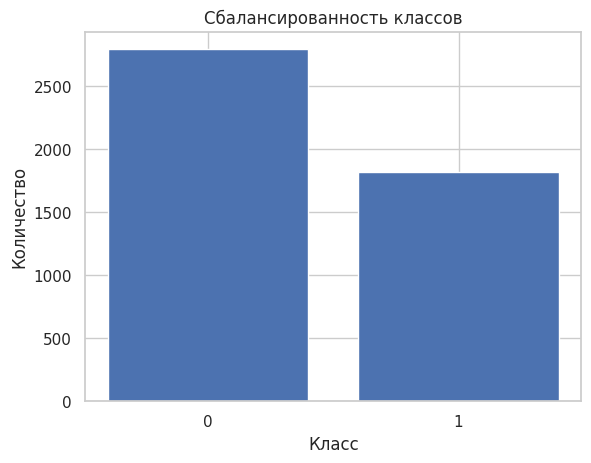

In [13]:
# Подсчитываем количество уникальных значений в столбце с классами
class_counts = df['Class'].value_counts()

# Визуализируем баланс классов
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Класс')
plt.xticks(df['Class'].unique())
plt.ylabel('Количество')
plt.title('Сбалансированность классов')
plt.show()

## 3. Произвести разбиение на тестовую и обучающую выборку

In [14]:
X = df.drop(columns=['Class'])
y = df['Class']

# 80% / 20%
for train_index, test_index in skl.model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42).split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
print("Размер первой обучающей выборки:", X_train.shape[0])
print("Размер первой тестовой выборки:", X_test.shape[0], '\n')


# 70% / 30%
for train_index, test_index in skl.model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42).split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
print("Размер второй обучающей выборки:", X_train.shape[0])
print("Размер второй тестовой выборки:", X_test.shape[0])

Размер первой обучающей выборки: 3680
Размер первой тестовой выборки: 921 

Размер второй обучающей выборки: 3220
Размер второй тестовой выборки: 1381
